# 1. Classification

### TODO:
- boostrap roc(sample)?
- imblanced data?
- default condusion matrix?
- multiple class roc(confusion matrix)?

In [1]:
import random
import scipy
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scikitplot as skplt
import sklearn
from sklearn import preprocessing
from sklearn import datasets 
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import *
from sklearn.metrics import *


In [2]:
def plot_all(X_test, y_test, all_clfs, clf_names):
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    plot_roc_curve(X_test, y_test, all_clfs, clf_names)
    plt.subplot(122)
    plot_pr_curve(X_test, y_test, all_clfs, clf_names)
    plt.savefig(image_path+file.split('.')[0]+'-roc_pr')
    plt.show()

In [3]:
#plot tools
def plot_roc_curve(X_test, y_test, all_clfs, clf_names):
    roc_scores = dict()
#     plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.02])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    np.random.seed(0)

    for clf, clf_name in zip(all_clfs, clf_names):
        probs = clf.predict_proba(X_test)
        if probs.shape[1] > 2:
            plot_multiclass_roc(y_test, probs, clf_name)
            continue
        preds = probs[:,1]
        fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, preds)
        roc_auc = sklearn.metrics.auc(fpr, tpr)
        roc_scores[clf_name] = roc_auc
#         np.random.seed(abs(hash(clf_name))%(2**32))
        plt.plot(fpr, tpr, 'b', label = '%s (AUC = %0.3f)' % (clf_name,roc_auc), c=np.random.rand(3,))
        plt.legend(loc = 'lower right')
#     plt.savefig(image_path+file.split('.')[0]+'_roc')
#     plt.show()
    return roc_scores

def plot_pr_curve(X_test, y_test, all_clfs, clf_names):
    pr_scores = dict()
#     plt.figure(figsize=(10,8))
    plt.title('Precision-Recall Curve')
    plt.plot([0, 1], [1, 0],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.02])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    np.random.seed(0)
    
    for clf, clf_name in zip(all_clfs, clf_names):
        probs = clf.predict_proba(X_test)
        if probs.shape[1]>2:
            plot_multiclass_pr(y_test, probs, clf_name)
            continue
        preds = probs[:,1]
        precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test, preds)
        pr_auc = sklearn.metrics.auc(recall, precision)
        pr_scores[clf_name] = pr_auc
#         np.random.seed(abs(hash(clf_name))%(2**32))
        plt.plot(recall, precision, 'b', label = '%s (AUC = %0.3f)' % (clf_name,pr_auc), c=np.random.rand(3,))
        plt.legend(loc = 'lower left')
#     plt.savefig(image_path+file.split('.')[0]+'_pr')
#     plt.show()
    return pr_scores

def plot_multiclass_roc(y_true, y_probas, clf_name):
#     skplt.metrics.plot_roc(y_true, y_probas, title=clf_name+" ROC Curve", figsize=(10,8))
#     skplt.metrics.plt.savefig(image_path+file.split('.')[0]+'-'+clf_name+'_multiclass_roc')
#     skplt.metrics.plt.show()
    pass
    
def plot_multiclass_pr(y_true, y_probas, clf_name):
#     skplt.metrics.plot_precision_recall(y_true, y_probas, title=clf_name+" PR Curve", figsize=(10,8))
#     skplt.metrics.plt.savefig(image_path+file.split('.')[0]+'-'+clf_name+'_multiclass_pr')
#     skplt.metrics.plt.show()
    pass

In [4]:
# classifiers
def train_KNN(X_train, y_train):
    print('Training KNN ...')
    knn = KNeighborsClassifier()
#     scoring = ['roc_auc']
    param_distributions = {
        'n_neighbors' : scipy.stats.randint(1,20)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(knn,param_distributions,n_iter=20,cv=3,n_jobs=-1,
                                                        iid=False,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv.best_estimator_

def train_SVM(X_train, y_train):
    print('Training SVM ...')
    svm = SVC(kernel='rbf', probability=True, cache_size=3000, random_state=0)
#     scoring = ['roc_auc']
    param_distributions = {
        'C' : scipy.stats.reciprocal(1.0, 100.),
        'gamma' : scipy.stats.reciprocal(0.01, 10.),
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(svm,param_distributions,n_iter=20,cv=3,n_jobs=-1,
                                                        iid=False,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv.best_estimator_

def train_DecisionTree(X_train, y_train):
    print('Training DecisionTree ...')
    tree = DecisionTreeClassifier(random_state=0)
#     scoring = ['roc_auc']
    param_distributions = {
        'max_depth' : scipy.stats.randint(10,1000)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(tree,param_distributions,n_iter=30,cv=3,n_jobs=-1,
                                                        iid=False,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv.best_estimator_

def train_RandomForest(X_train, y_train):
    print('Training RandomForest ...')
    forest = RandomForestClassifier(random_state=0)
#     scoring = ['roc_auc']
    param_distributions = {
        'max_depth' : scipy.stats.randint(10,100),
        'n_estimators' : scipy.stats.randint(100,1000)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(forest,param_distributions,n_iter=10,cv=3,n_jobs=-1,
                                                        iid=False,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv.best_estimator_

def train_AdaBoost(X_train, y_train):
    print('Training AdaBoost ...')
    boost = AdaBoostClassifier(random_state=0)
#     scoring = ['roc_auc']
    param_distributions = {
        'learning_rate' : scipy.stats.uniform(0.75, 1.25),
        'n_estimators' : scipy.stats.randint(40,70)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(boost,param_distributions,n_iter=30,cv=3,n_jobs=-1,
                                                        iid=False,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv.best_estimator_    

def train_LogisticRegression(X_train, y_train):
    print('Training LogisticRegression ...')
    lr = LogisticRegression(solver='liblinear', multi_class='auto', random_state=0)
#     scoring = ['roc_auc']
    param_distributions = {
        'C' : scipy.stats.reciprocal(1.0, 1000.),
        'max_iter' : scipy.stats.randint(100,1000)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(lr,param_distributions,n_iter=30,cv=3,n_jobs=-1,
                                                        iid=False,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv.best_estimator_ 

def train_GaussianNaiveBayes(X_train, y_train):
    print('Training GaussianNaiveBayes ...')
    gaussian = GaussianNB()
#     scoring = ['roc_auc']
    param_distributions = {
        'var_smoothing' : scipy.stats.uniform(1e-10, 1e-9),
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(gaussian,param_distributions,n_iter=30,cv=3,n_jobs=-1,
                                                        iid=False,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv.best_estimator_ 

def train_NeuralNetwork(X_train, y_train):
    print('Training NeuralNetwork ...')
    nn = MLPClassifier(solver='adam', random_state=0)
#     scoring = ['roc_auc']
    param_distributions = {
        'hidden_layer_sizes' : [(100,50,10)],
        'learning_rate_init' : scipy.stats.uniform(0.001, 0.005),
        'max_iter' : scipy.stats.randint(200,500)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(nn,param_distributions,n_iter=10,cv=3,n_jobs=-1,
                                                        iid=False,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv.best_estimator_ 

In [5]:
#data processiong tools
def encode_labels(x_train, x_test, cols=None):
    label_encoder = sklearn.preprocessing.LabelEncoder()
    if cols == None:
        for i,t in enumerate(x_train.dtypes):
            if t == 'object':
                label_encoder.fit(df.iloc[:,i])
                x_train.iloc[:,i] = label_encoder.transform(x_train.iloc[:,i])
                x_test.iloc[:,i] = label_encoder.transform(x_test.iloc[:,i])   
    else:#only encode last col
        x_train.iloc[:] = label_encoder.fit_transform(x_train.iloc[:])
        x_test.iloc[:] = label_encoder.transform(x_test.iloc[:])
    return x_train, x_test

#put class colunmn at end of dataframe
def reorder_columns(dataFrame):
    cols = dataFrame.columns.tolist()
    cols = cols[1:] + cols[:1]
    return dataFrame[cols]

#impute ? with given strategy
def impute_value(x_train, x_test, strategy):
    try:
        x_train = x_train.replace({'?' : np.nan})
        x_test = x_test.replace({'?' : np.nan})
    except:
        print('no question mark found')
    if strategy == None:
        return x_train.dropna(), x_test.dropna()
    else:
        imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
        train_type_dic = dict()#keep original train data type before impute
        for i,t in enumerate(x_train.dtypes):
            if t != 'object':
                train_type_dic[i] = t
        test_type_dic = dict()#keep original test data type before impute
        for i,t in enumerate(x_test.dtypes):
            if t != 'object':
                test_type_dic[i] = t        
        x_train = pd.DataFrame(imp.fit_transform(x_train))
        x_test = pd.DataFrame(imp.transform(x_test))
        for key in train_type_dic:
            x_train.iloc[:,key] = x_train.iloc[:,key].astype(train_type_dic[key])
        for key in test_type_dic:
            x_test.iloc[:,key] = x_test.iloc[:,key].astype(test_type_dic[key])
        return x_train, x_test

In [6]:
#data sets
data_path = 'dataset/'
image_path = 'image/'

file1 = 'messidor_features.arff'
data1 = arff.loadarff(data_path+file1)
df1 = pd.DataFrame(data1[0])
# df1 = encode_labels(df1)

file2 = 'default of credit card clients.xls'
df2 = pd.read_excel(data_path+file2,index_col=0,header=1)
df2 = df2.sample(5000,random_state=0)

file3 = 'breast-cancer-wisconsin.data'
df3 = pd.read_csv(data_path+file3,header=None, index_col=0)
df3 = df3[df3[6]!='?'].astype('int64')
# df3 = encode_labels(df3, [-1])

file3_2 = 'wdbc.data'
df3_2 = pd.read_csv(data_path+file3_2,header=None, index_col=0)
df3_2 = reorder_columns(df3_2)
# df3_2 = encode_labels(df3_2)

file3_3 = 'wpbc.data'
df3_3 = pd.read_csv(data_path+file3_3,header=None, index_col=0)
df3_3 = reorder_columns(df3_3)
df3_3 = df3_3[df3_3[34]!='?']
df3_3[34] = df3_3[34].astype('int64')
# df3_3 = encode_labels(df3_3)

file4 = 'australian.dat'
df4 = pd.read_csv(data_path+file4,header=None,sep=' ')
df4 = reorder_columns(df4)

file5 = 'german.data-numeric'
df5 = pd.read_csv(data_path+file5,header=None,sep=' +', engine='python')
# df5 = encode_labels(df5, [-1])

#multi-class
file6 = 'Faults.NNA'
df6 = pd.read_csv(data_path+file6,header=None,sep='\t', engine='python')
cats  = df6.iloc[:,-7:].idxmax(axis=1)
df6 = pd.concat([df6.iloc[:,:-7],cats],axis=1)
# df6 = encode_labels(df6, [-1])

file7 = 'adult.data'
df7 = pd.read_csv(data_path+file7,header=None,sep=', ', engine='python')
df7 = df7.sample(5000, random_state=0)
# df7 = impute_value(df7, 'most_frequent')
# df7 = encode_labels(df7)

#multi-class
file8 = 'yeast.data'
df8 = pd.read_csv(data_path+file8,header=None,sep=' +', index_col=0, engine='python')
# df8 = encode_labels(df8)

#error dataset
file9 = 'ThoraricSurgery.arff'
data9 = arff.loadarff(data_path+file9)
df9 = pd.DataFrame(data9[0])
# d9 = encode_labels(df9)

file10 = 'seismic-bumps.arff'
data10, meta = arff.loadarff(data_path+file10)
df10 = pd.DataFrame(data10)
# df10 = encode_labels(df10)

In [7]:
def run_all_clfs(X_train, y_train, X_test, y_test):
    all_clfs = []
    clf_names = []

    clf1 = train_KNN(X_train, y_train)
    all_clfs.append(clf1)
    clf_names.append('KNN')

    clf2 = train_SVM(X_train, y_train)
    all_clfs.append(clf2)
    clf_names.append('SVM')

    clf3 = train_DecisionTree(X_train, y_train)
    all_clfs.append(clf3)
    clf_names.append('Decision Tree')

    clf4 = train_RandomForest(X_train, y_train)
    all_clfs.append(clf4)
    clf_names.append('Random Forest')

    clf5 = train_AdaBoost(X_train, y_train)
    all_clfs.append(clf5)
    clf_names.append('AdaBoost')

    clf6 = train_LogisticRegression(X_train, y_train)
    all_clfs.append(clf6)
    clf_names.append('Logistic regression')

    clf7 = train_GaussianNaiveBayes(X_train, y_train)
    all_clfs.append(clf7)
    clf_names.append('Gaussian Naive Bayes')

    clf8 = train_NeuralNetwork(X_train, y_train)
    all_clfs.append(clf8)
    clf_names.append('NeuralNetwork')

#     plot_roc_curve(X_test,y_test,all_clfs,clf_names)
#     plot_pr_curve(X_test,y_test,all_clfs,clf_names)
    plot_all(X_test, y_test, all_clfs, clf_names)

In [8]:
def make_classification(file, df):
    print("Dataset : %s" % file)
    #     df.info()
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    assert len(y.shape) == 1, "wrong shape of y"
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
    X_train, X_test = impute_value(X_train, X_test, strategy='most_frequent')
    X_train, X_test = encode_labels(X_train, X_test)
#     y_train, y_test = impute_value(y_train, y_test, strategy='most_frequent')
    y_train, y_test = encode_labels(y_train, y_test, -1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)    
    run_all_clfs(X_train, y_train, X_test, y_test)    

Dataset : wdbc.data
no question mark found
Training KNN ...
Training SVM ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training LogisticRegression ...
Training GaussianNaiveBayes ...
Training NeuralNetwork ...


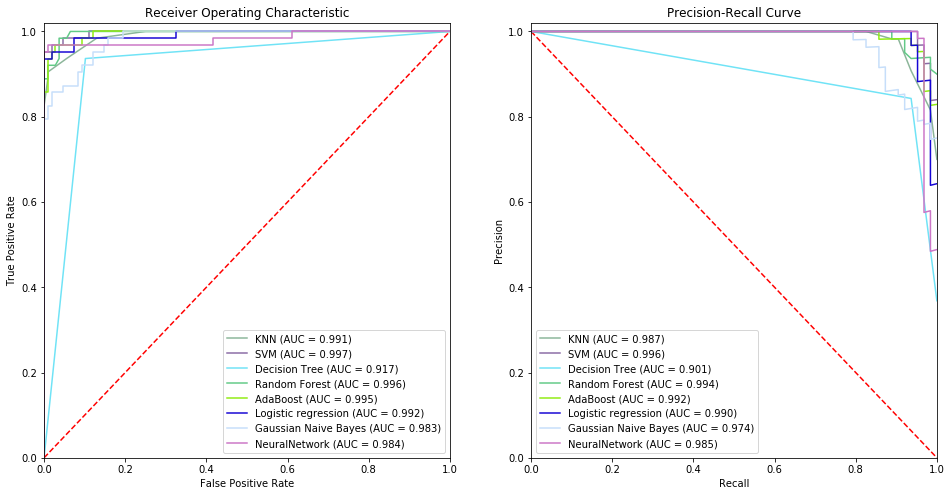

Dataset : wpbc.data
no question mark found
Training KNN ...
Training SVM ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training LogisticRegression ...
Training GaussianNaiveBayes ...
Training NeuralNetwork ...


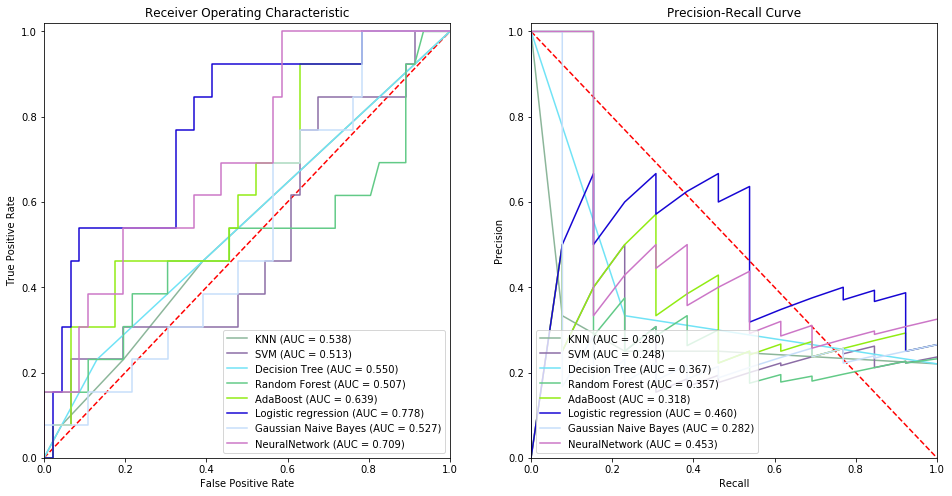

In [10]:
# %%time
files = [file1,file2,file3,file3_2,file3_3,file4,file5,file6,file7,file8,file9,file10]
dfs = [df1,df2,df3,df3_2,df3_3,df4,df5,df6,df7,df8,df9,df10]

for file,df in zip(files,dfs):
    make_classification(file, df)